In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as st
import math

In [6]:
data_path = r'G:\GlitchDetect\data\24hrs_1hr_25_11hr_50.csv'

df = pd.read_csv(data_path)

print("THIS IS THE FIRST 5 ROWS OF THE DATA\n", df.head())

print("THE NUMBER OF RECORDS ARE : ", len(df))

print("THE",len(df.columns) ,"COLUMNS OF THE DATA ARE : \n", '\n'.join(df.columns))

THIS IS THE FIRST 5 ROWS OF THE DATA
    Seconds        Timestamp_IST   P1_PS_UP   P1_TS_UP  10-MOV1118  P8_PS_DN  \
0        0  2025-08-12 20:59:14  55.882044  24.987683        -100  0.001800   
1        5  2025-08-12 20:59:19  55.953733  25.001739        -100  0.001801   
2       10  2025-08-12 20:59:24  55.919857  24.983877        -100  0.001800   
3       15  2025-08-12 20:59:29  55.925245  25.022044        -100  0.001800   
4       20  2025-08-12 20:59:34  55.924786  25.013001        -100  0.001800   

    P8_TS_DN  20-MOV-1301  20-MOV-1304   P2_PS_UP  ...  CP8  20-MOV-1303  \
0  28.314431         -100         -100  43.301065  ... -100         -100   
1  28.277674         -100         -100  43.315558  ... -100         -100   
2  28.279411         -100         -100  43.364629  ... -100         -100   
3  28.264607         -100         -100  43.313045  ... -100         -100   
4  28.295912         -100         -100  43.328678  ... -100         -100   

   10-MOV1117  10-MOV1103  MOV

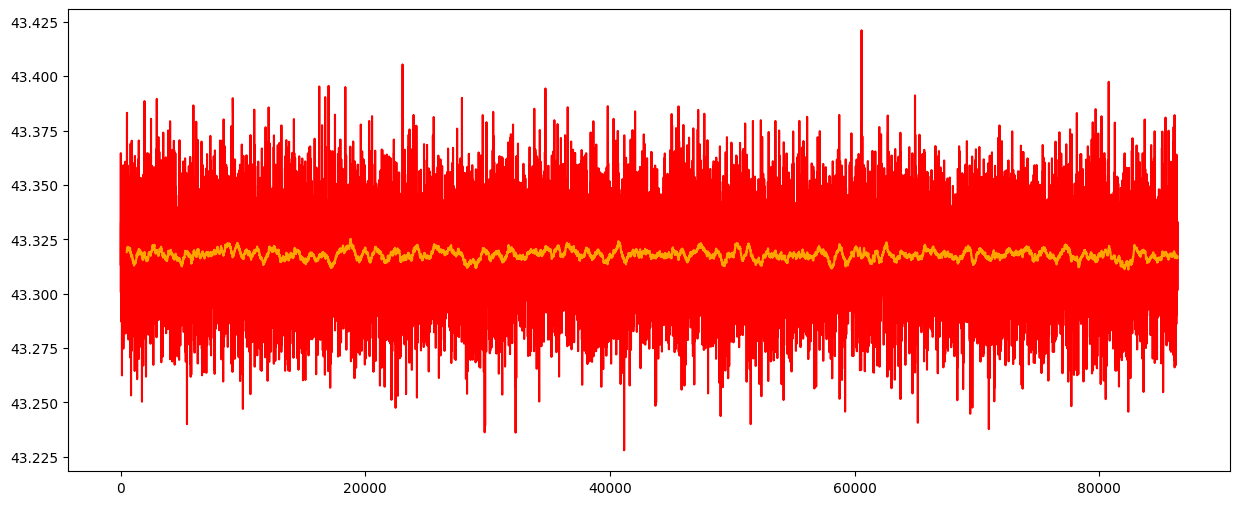

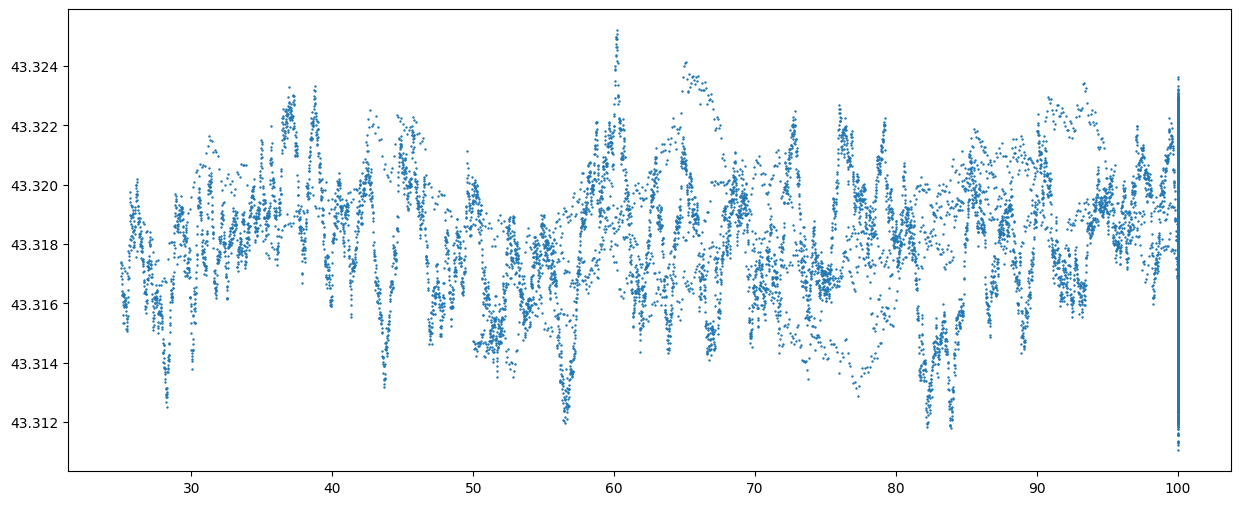

In [23]:
trend = 'P2_PS_UP'
plt.figure(figsize=(15,6))
plt.plot(df['Seconds'], df[trend], color= 'red')

trend_roll = df[trend].rolling(window=100).mean()
plt.plot(df['Seconds'], trend_roll, color='orange')

plt.show()
plt.figure(figsize=(15,6))
plt.plot(-1 * df['S1-MOV-1001'], trend_roll, '+', markersize=1  )

<Figure size 1500x600 with 0 Axes>

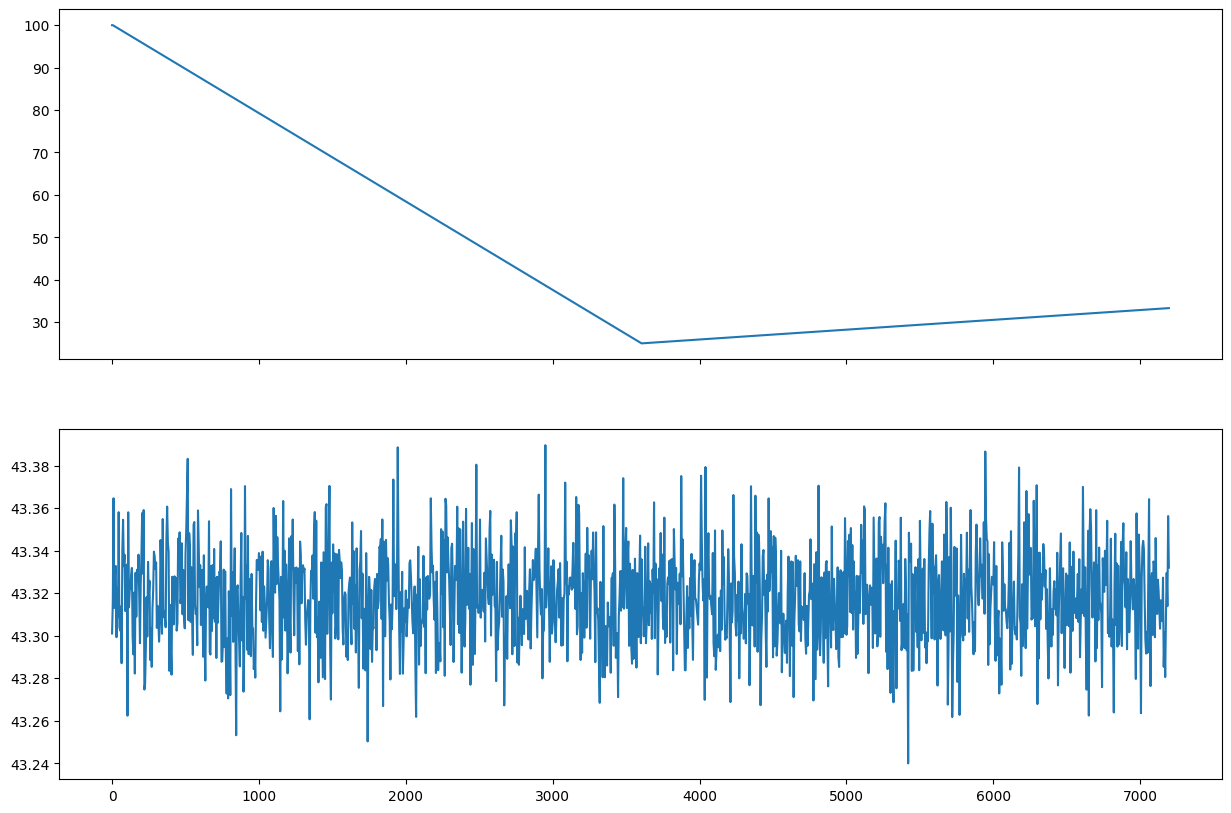

In [39]:
trend = 'P2_PS_UP'

df_time = df['Seconds'][:1440]
df_trend_at_0hrs_to_2_hrs = df[trend][:1440]
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

ax[0].plot(df_time, -1 * df['S1-MOV-1001'][:1440])
ax[1].plot(df_time, df_trend_at_0hrs_to_2_hrs)

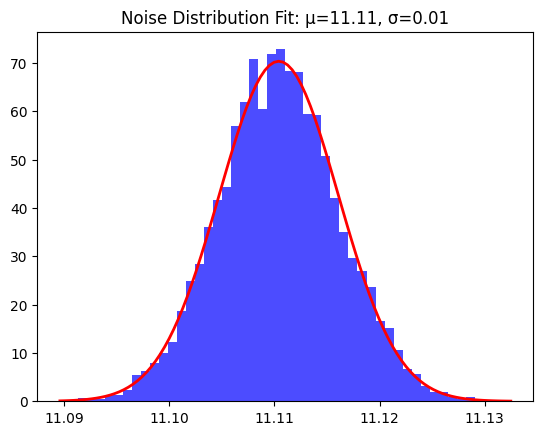

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

signal = df['P8_PS_UP']

mean = np.mean(signal)
std = np.std(signal, ddof=1)

# Histogram normalized
plt.hist(signal, bins=50, density=True, color='blue', alpha=0.7)

# Fit PDF
x = np.linspace(signal.min(), signal.max(), 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, 'r', linewidth=2)

plt.title(f"Noise Distribution Fit: μ={mean:.2f}, σ={std:.2f}")
plt.show()


In [ ]:
import numpy as np
from scipy import stats

signal = np.array(signal)  # make sure it's a numpy array
n = len(signal)
mean = np.mean(signal)
std = np.std(signal, ddof=1)  # sample std deviation

# 95% confidence interval using t-distribution
confidence = 0.95
alpha = 1 - confidence
t_score = stats.t.ppf(1 - alpha/2, df=n-1)

margin_error = t_score * (std/np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"Mean: {mean:.3f}")
print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

Mean: 11.110
95% Confidence Interval: [11.110, 11.111]
